In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
data = data[['Close', 'Volume']]
data['Moving_Avg'] = data['Close'].rolling(window=20).mean()

[*********************100%***********************]  1 of 1 completed
<ipython-input-2-8bc7ede009be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Moving_Avg'] = data['Close'].rolling(window=20).mean()


In [ ]:
data = data.dropna()

In [ ]:
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()

In [ ]:
X_simple = data[['Close']]
y_simple = data['Next_Close']

In [ ]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [ ]:
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

LinearRegression()

In [ ]:
y_pred_simple = simple_model.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

In [ ]:
print(f"Simple Linear Regression MSE: {mse_simple}")
print(f"Simple Linear Regression R2: {r2_simple}")


Simple Linear Regression MSE: 8.307271762252274
Simple Linear Regression R2: 0.9912195321425457


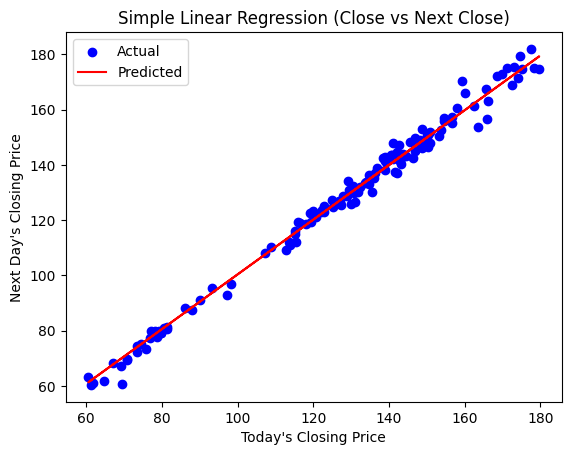

In [ ]:
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.title("Simple Linear Regression (Close vs Next Close)")
plt.xlabel("Today's Closing Price")
plt.ylabel("Next Day's Closing Price")
plt.legend()
plt.show()

In [ ]:
X_multiple = data[['Close', 'Volume', 'Moving_Avg']]
y_multiple = data['Next_Close']

In [ ]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [ ]:
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [ ]:
y_pred_multiple = multiple_model.predict(X_test_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

In [ ]:
print(f"Multiple Linear Regression MSE: {mse_multiple}")
print(f"Multiple Linear Regression R2: {r2_multiple}")

Multiple Linear Regression MSE: 8.279014962537257
Multiple Linear Regression R2: 0.9912493984968378


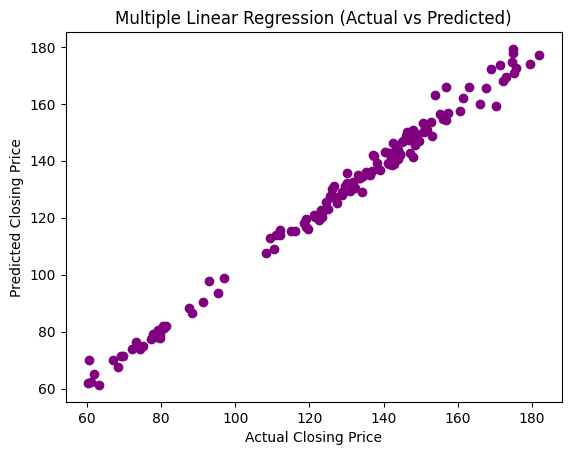

In [ ]:
plt.scatter(y_test_multiple, y_pred_multiple, color='purple')
plt.title("Multiple Linear Regression (Actual vs Predicted)")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.show()